# PRE-OWNED CAR PRICE PREDICTION

	This dataset contains information about used cars.

	This data can be used for a lot of purposes such as price prediction (Selling Price).

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Dataset link :-https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [2]:
#Reading car data.csv file
#RCP --ResaleCarPrice

RCP=pd.read_csv("car data.csv")

In [3]:
#Checking dataframe
RCP.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# COLUMN INFO

	Name -- Name of the cars

	Year -- Year of the car when it was bought

	selling_price -- Price at which the car is being sold

	km_driven -- Number of Kilometres the car is driven

	fuel -- Fuel type of car (petrol / diesel / CNG / LPG / electric)

	seller_type -- Tells if a Seller is Individual or a Dealer

	transmission -- Gear transmission of the car (Automatic/Manual)

	owner -- Number of previous owners of the car.


In [4]:
#Checking dimensionality
RCP.shape

(301, 9)

In [5]:
#checking dataframe info
RCP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#Descriptive statistics
RCP.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
RCP.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
#Checking unique elements in Car_Name column
RCP["Car_Name"].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

**So we have cars and two wheelers also in the dataset.**

In [9]:
#Columns name in dataframe
RCP.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
#Creating a new dataframe
final_RCP=RCP[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [11]:
#Checking new data frame
final_RCP.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
#Creating new feature i.e, current year (to check how old the vehicle/depriciation)

final_RCP["Current_Year"]=2022

In [13]:
# Creating new column to check how old the vehicle is...

final_RCP["No_years"]=final_RCP["Current_Year"]-final_RCP["Year"]

In [14]:
final_RCP.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [15]:
# to drop year and Current year columns

final_RCP.drop(columns=["Year","Current_Year"],axis=1,inplace=True)

In [16]:
final_RCP.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


# Data Exploration

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


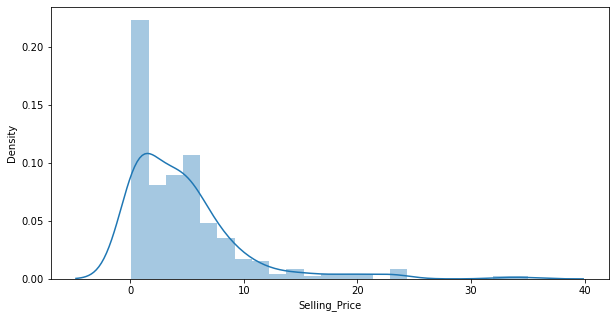

In [17]:
#Data Disrribution of target column

plt.figure(figsize=(10,5))
sns.distplot(RCP["Selling_Price"])
plt.show()

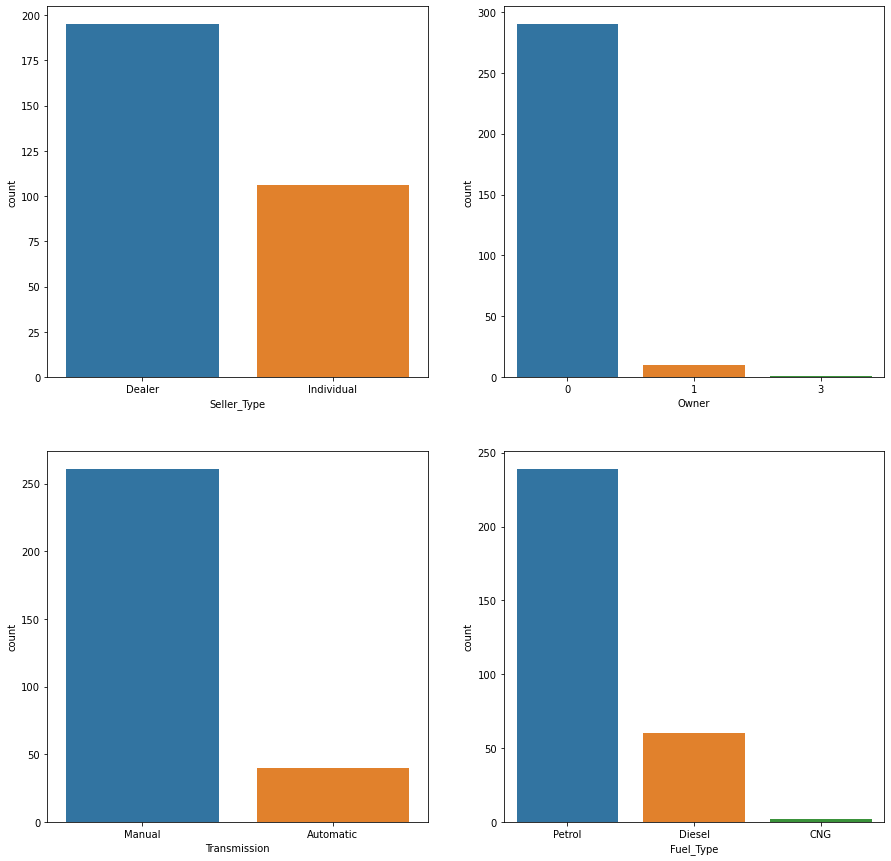

In [18]:
f, axes = plt.subplots(2,2, figsize=(15,15))

sns.countplot(x='Seller_Type',data=final_RCP,ax=axes[0,0])
sns.countplot(x='Owner',data=final_RCP,ax=axes[0,1])
sns.countplot(x='Transmission',data=final_RCP, ax=axes[1,0])
sns.countplot(x='Fuel_Type',data=final_RCP,ax=axes[1,1])

plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


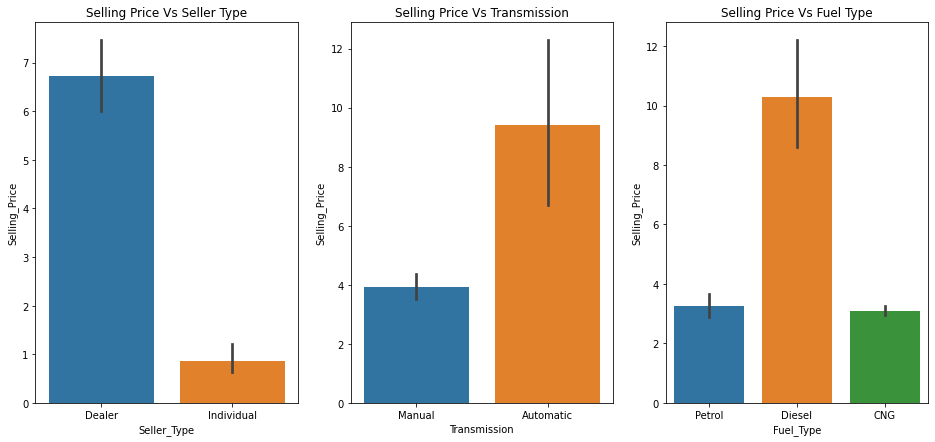

In [19]:
plt.figure(figsize=(16,7))
plt.subplot(1,3,1)
sns.barplot(RCP['Seller_Type'], RCP['Selling_Price'])
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(RCP['Transmission'],RCP['Selling_Price'])
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(RCP['Fuel_Type'],RCP['Selling_Price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()

•	Dealers gets more selling price than the individuals (real owners).

•	Automatic transmission vehicles have more selling price.

•	Diesel vehicles have high selling price.


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


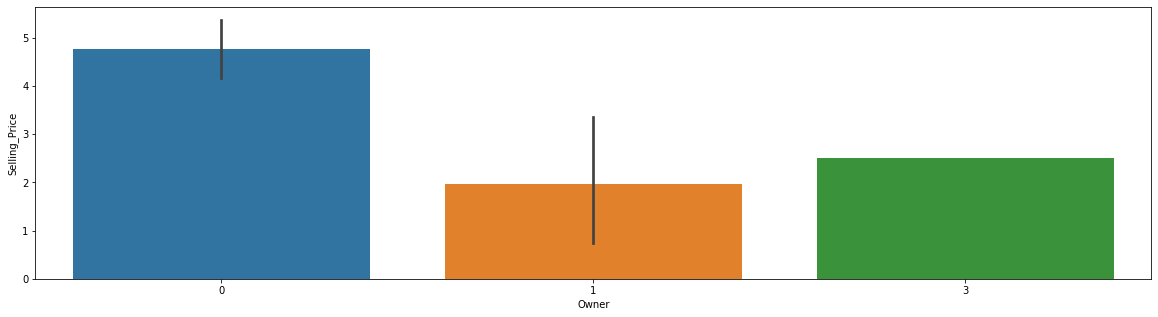

In [20]:
plt.figure(figsize=(20,5))
sns.barplot(RCP['Owner'],RCP['Selling_Price'])
plt.show()

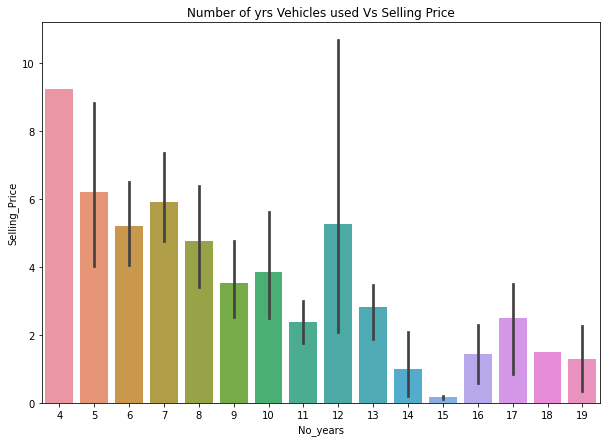

In [21]:
plt.figure(figsize=(10,7))
sns.barplot(x='No_years',y='Selling_Price',data=final_RCP)
plt.title("Number of yrs Vehicles used Vs Selling Price")
plt.show()

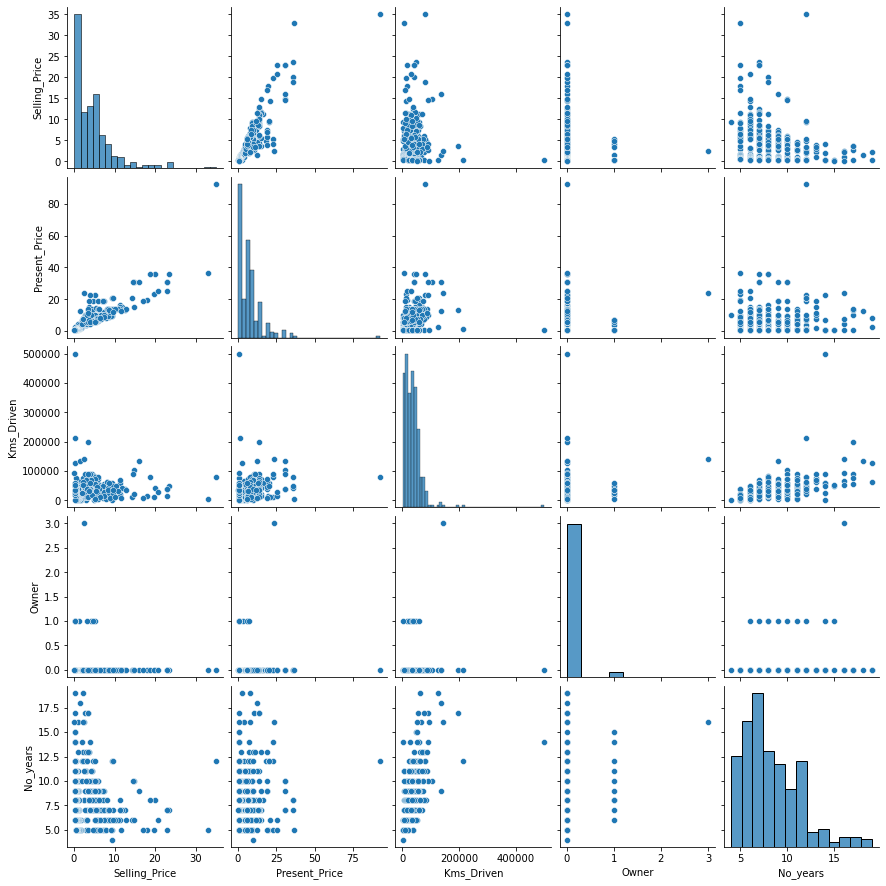

In [22]:
sns.pairplot(data=final_RCP ,palette="magma")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


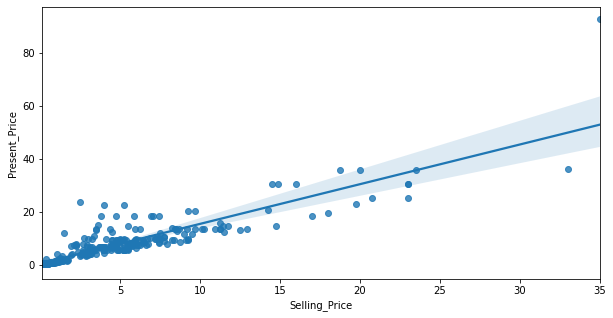

In [23]:
plt.figure(figsize=(10,5))
sns.regplot(final_RCP['Selling_Price'],final_RCP['Present_Price'])
plt.show()

•	Selling price increases with the increase in present price.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price', ylabel='Kms_Driven'>

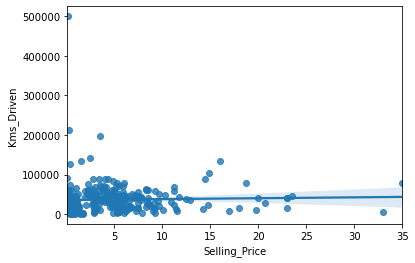

In [24]:
sns.regplot(RCP['Selling_Price'],RCP['Kms_Driven'])

•	As a vehicles driven more the selling price start decreasing.

In [25]:
#finding unique values in categorical features

print(RCP["Seller_Type"].unique())
print(RCP["Fuel_Type"].unique())
print(RCP["Transmission"].unique())
print(RCP["Owner"].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [26]:
#Get dummies
final_RCP=pd.get_dummies(final_RCP,drop_first=True)

In [27]:
final_RCP.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


<AxesSubplot:>

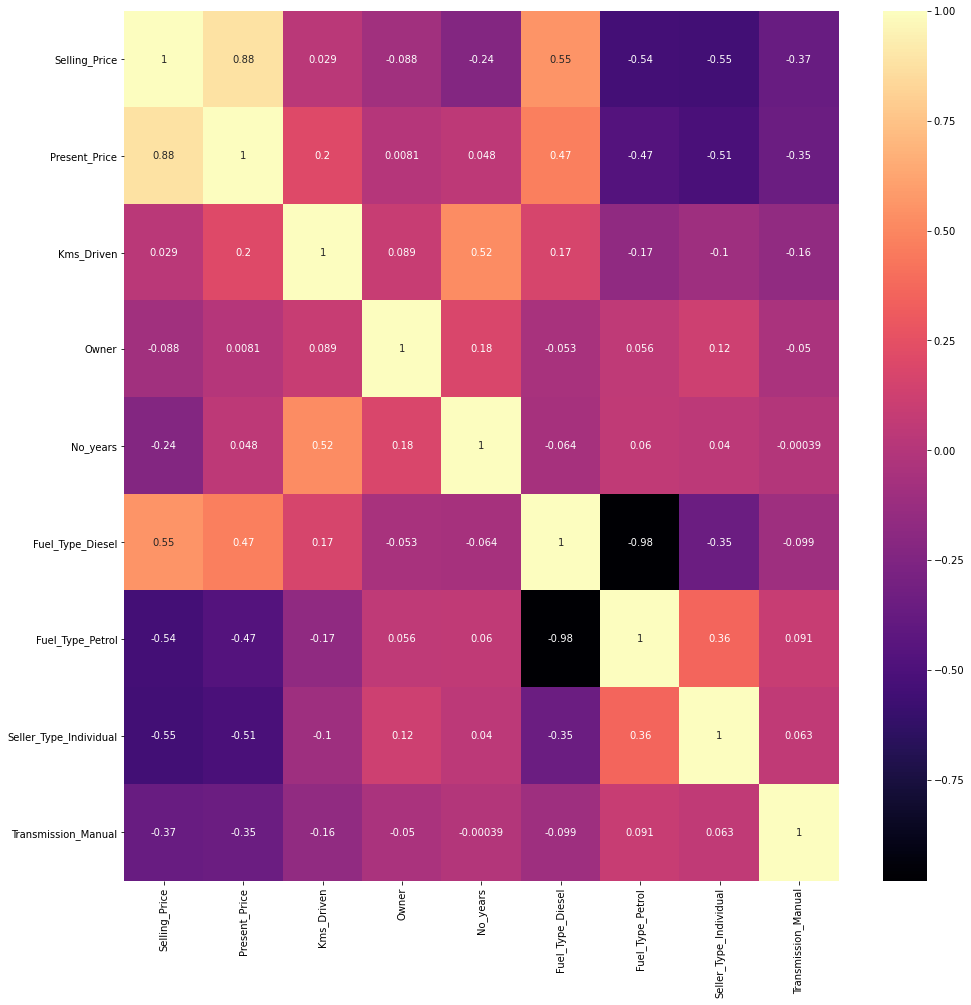

In [28]:
#heatmap for correlation

plt.figure(figsize=(16,16))
sns.heatmap(final_RCP.corr(),annot=True, cmap="magma")

<AxesSubplot:>

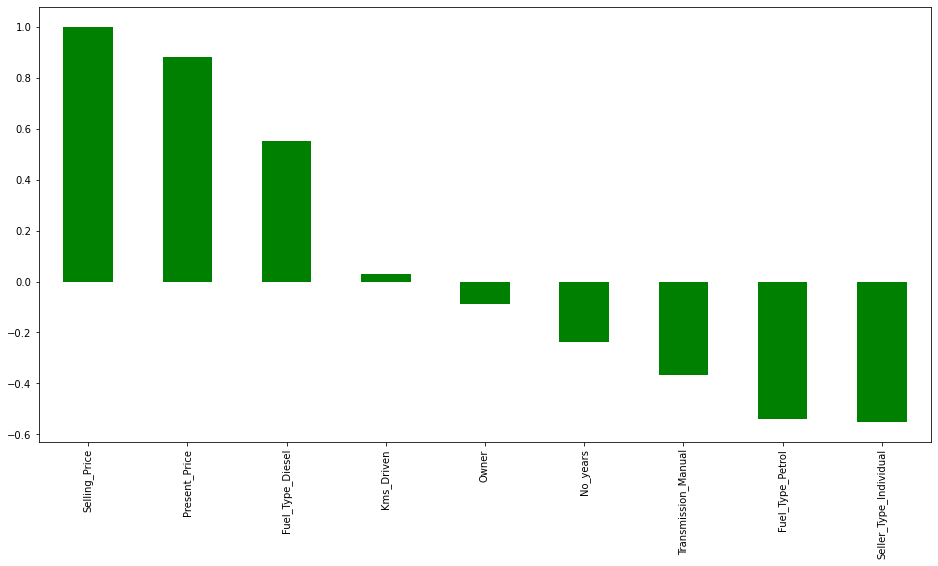

In [29]:
#Checking correlation with respect to target column("SELLING PRICE")

plt.figure(figsize=(16,8))
final_RCP.corr()["Selling_Price"].sort_values(ascending=False).plot(kind="bar",color="green")

**First split up our data into an X that contains the features to train on, and a y with the target variable.**

In [30]:
X=final_RCP.drop("Selling_Price",axis=1)

y=final_RCP["Selling_Price"]

In [31]:
### To find important features ###

from sklearn.ensemble import ExtraTreesRegressor

In [32]:
model=ExtraTreesRegressor()

In [33]:
model.fit(X,y)

ExtraTreesRegressor()

In [34]:
print(model.feature_importances_)

[0.37174042 0.04023334 0.00042231 0.07620455 0.23205735 0.01075644
 0.13308698 0.13549862]


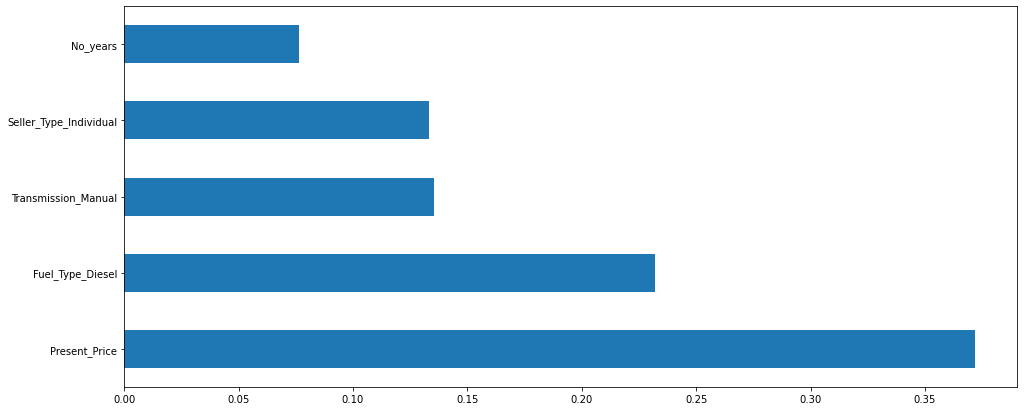

In [35]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

plt.figure(figsize=(16,7))
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

 # Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

**Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model. Taking training data 80% and 20% for model testing.**

In [37]:
 X_train,X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=19)

In [38]:
#to check shape

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 8)
(61, 8)
(240,)
(61,)


# Linear Regression Model

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr=LinearRegression()

In [41]:
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
predictions = lr.predict( X_test)

In [43]:
# calculating MAE,MSE and RMSE
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr_MAE=metrics.mean_absolute_error(y_test, predictions)
lr_MSE= metrics.mean_squared_error(y_test, predictions)
lr_RMSE=np.sqrt(metrics.mean_squared_error(y_test, predictions))

print('MAE:',lr_MAE )
print('MSE:',lr_MSE)
print('RMSE:',lr_RMSE )

MAE: 1.3293762673076899
MSE: 6.311496604191107
RMSE: 2.5122692141152205


In [44]:
lr_r_squared = r2_score(y_test,predictions)
print("R_squared :",lr_r_squared)

R_squared : 0.8366959062120508


In [45]:
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Present_Price,0.517795
Kms_Driven,-0.000006
Owner,-1.319766
No_years,-0.416041
Fuel_Type_Diesel,2.050125
Fuel_Type_Petrol,0.529691
Seller_Type_Individual,-0.593701
Transmission_Manual,-0.574946


Text(0, 0.5, 'Predicted Y')

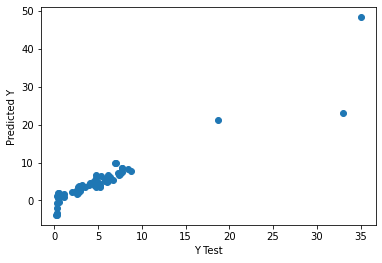

In [46]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

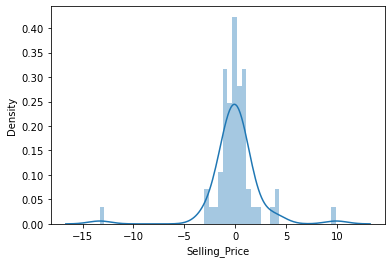

In [47]:
sns.distplot((y_test-predictions),bins=50)

**The graph showing normal distribution. The model givinging good results.**

# Decision Tree Regressor Model

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
dtree = DecisionTreeRegressor()

In [50]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [51]:
predictions = dtree.predict(X_test)

In [52]:
dtree_MAE=metrics.mean_absolute_error(y_test, predictions)
dtree_MSE= metrics.mean_squared_error(y_test, predictions)
dtree_RMSE=np.sqrt(metrics.mean_squared_error(y_test, predictions))

print('MAE:',dtree_MAE )
print('MSE:',dtree_MSE)
print('RMSE:',dtree_RMSE )

MAE: 1.0414754098360657
MSE: 9.189109836065574
RMSE: 3.031354455695601


In [53]:
dtree_r_squared = r2_score(y_test,predictions)
print("R_squared :",dtree_r_squared)

R_squared : 0.7622403451029123


Text(0, 0.5, 'Predicted Y')

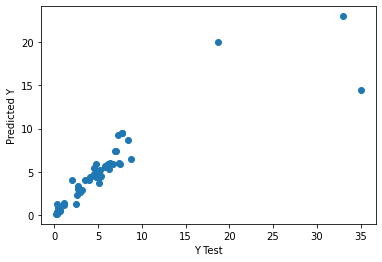

In [54]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

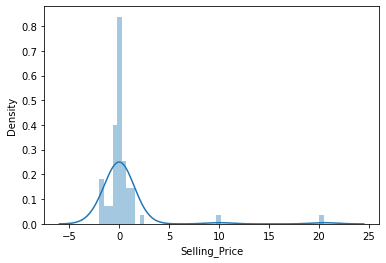

In [55]:
sns.distplot((y_test-predictions),bins=50)

# Random Forest Regressor Model

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rf = RandomForestRegressor()

In [58]:
# Training Model
rf.fit(X_train,y_train)

RandomForestRegressor()

In [59]:
predictions = rf.predict(X_test)

In [60]:
rf_MAE=metrics.mean_absolute_error(y_test, predictions)
rf_MSE= metrics.mean_squared_error(y_test, predictions)
rf_RMSE=np.sqrt(metrics.mean_squared_error(y_test, predictions))

print('MAE:',rf_MAE )
print('MSE:',rf_MSE)
print('RMSE:',rf_RMSE )

MAE: 0.8894114754098362
MSE: 9.096091057868852
RMSE: 3.015972655358276


In [61]:
rf_r_squared = r2_score(y_test,predictions)
print("R_squared :",rf_r_squared)

R_squared : 0.7646471193169062


Text(0, 0.5, 'Predicted Y')

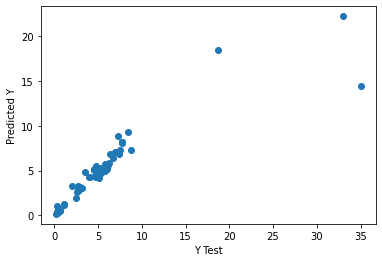

In [62]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

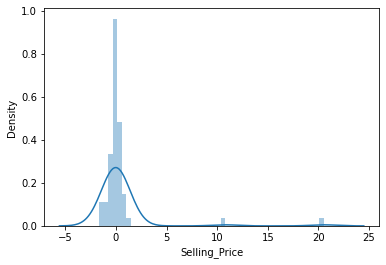

In [63]:
sns.distplot((y_test-predictions),bins=50)

In [64]:
models=pd.DataFrame({"Model":["Linear Regression","Decision Tree Regressor","Random Forest Regressor"],
                    "MAE":[lr_MAE,dtree_MAE,rf_MAE],
                    "MSE":[lr_MSE,dtree_MSE,rf_MSE],
                    "RMSE":[lr_RMSE,dtree_RMSE,rf_RMSE],
                    "R_Squared":[lr_r_squared,dtree_r_squared,rf_r_squared]})
models

,Model,MAE,MSE,RMSE,R_Squared
0,Linear Regression,1.329376,6.311497,2.512269,0.836696
1,Decision Tree Regressor,1.041475,9.189110,3.031354,0.762240
2,Random Forest Regressor,0.889411,9.096091,3.015973,0.764647


# Conclusion

•	Dealers gets more selling price than the individuals (real owners).

•	Automatic transmission vehicles have more selling price.

•	Diesel vehicles have high selling price.

•	Selling price increases with the increase in present price.

•	As a vehicles driven more the selling price start decreasing.

•	With increase in the age of vehicle the selling price start decreasing.